In [27]:
import numpy as np
from numpy import sqrt
from scipy import constants
from matplotlib import pyplot as plt

import particles

EV = constants.e/constants.h

def acs(f, polarisability):
    k = 2 * np.pi * f / constants.c
    return 4 * np.pi * k * polarisability.imag

def scs(f, polarisability):
    k = 2 * np.pi * f / constants.c
    return 4 * np.pi * np.abs(polarisability)**2 * k**4/(6*np.pi)

def ecs(f, polarisability):
    k = 2 * np.pi * f / constants.c
    return acs(f, polarisability) + scs(f, polarisability)

### Optical response of a single metallic nanoparticle

Let the NP be a sphere with radius $r = 20$ nm. Set the material to silver (default).

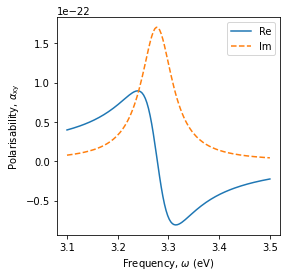

In [53]:
silver = particles.Metal()
sphere = particles.Particle(radius = 20E-9, height = 20E-9, material = silver)

f_min, f_max = 3.1 * EV, 3.5 * EV
f_range = np.linspace(f_min, f_max, 128)

alpha_xy, alpha_z = sphere.polarisability(f_range)
fig, ax = plt.subplots(1, figsize = (4, 4))

w_range = f_range / EV
ax.plot(w_range, alpha_xy.real, label = 'Re')
ax.plot(w_range, alpha_xy.imag, ls='--', label = 'Im')

ax.legend()

ax.set_xlabel(r'Frequency, $\omega$ (eV)')
ax.set_ylabel(r'Polarisability, $\alpha_\mathrm{xy}$')
plt.show()

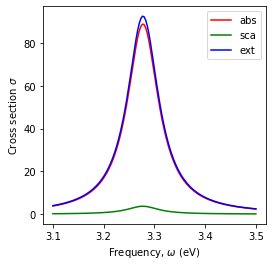

In [51]:
sphere = particles.Particle(radius = 20E-9, height = 20E-9)

f_min, f_max = 3.1 * EV, 3.5 * EV
f_range = np.linspace(f_min, f_max, 128)

alpha_xy, alpha_z = sphere.polarisability(f_range)

absorption = acs(f_range, alpha_xy)
scattering = scs(f_range, alpha_xy)
extinction = ecs(f_range, alpha_xy)

fig, ax = plt.subplots(1, figsize = (4, 4))

w_range = f_range / EV
ax.plot(w_range, absorption / (20E-9)**2, c='r', label='abs')
ax.plot(w_range, scattering / (20E-9)**2, c='g', label='sca')
ax.plot(w_range, extinction / (20E-9)**2, c='b', label='ext')

ax.legend()
ax.set_xlabel(r'Frequency, $\omega$ (eV)')
ax.set_ylabel(r'Cross section $\sigma$')

plt.show()